In [38]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
# import gmaps
import os

# Create dataframe with Pandas

gun_violence_data = pd.read_csv("archive.zip")

# confirm df creation and check data
gun_violence_data.dtypes

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

In [39]:
# create df showing kills and injuries by state
state_casualties = gun_violence_data.groupby(gun_violence_data["state"])

# check number of states
count = state_casualties["state"].nunique()
count


state
Alabama                 1
Alaska                  1
Arizona                 1
Arkansas                1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Maine                   1
Maryland                1
Massachusetts           1
Michigan                1
Minnesota               1
Mississippi             1
Missouri                1
Montana                 1
Nebraska                1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Ohio                    1
Oklahoma                1
Oregon                  1
Pennsy

In [40]:
# Check states are correctand why there are 51 states
for state in state_casualties:
    print(state[0], end=" | ")


Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Maryland | Massachusetts | Michigan | Minnesota | Mississippi | Missouri | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah | Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming | 

In [41]:
## No repeats or errors in data frame. However District of Columbia has been separated out in the data.
# kill totals for plotting purposes
kill_sum = state_casualties["n_killed"].sum()

# injured totals for plotting purposes
injury_sum = state_casualties["n_injured"].sum()

# create data frame of kills and injuries by state for plotting
casualty_sum = pd.DataFrame({"Kill Count":kill_sum,
    "Injury Count":injury_sum})

# combine District of Columbia and Virginia since DC isn't a state
VirginaDC = casualty_sum.loc[['District of Columbia', 'Virginia']].sum()
VirginaDC.name=f"Dist of Col & Virginia\n\n"

# Add New Virginia total to data frame
casualty_sum = casualty_sum.append(VirginaDC)

# drop disctrict of Columbia from and Virginia since from df
casualty_sum.drop(["Virginia", 'District of Columbia'], inplace = True )

casualty_sum

,Kill Count,Injury Count
state,,
Alabama,1880,2998
Alaska,267,325
Arizona,1094,1096
Arkansas,773,1347
California,5562,7644
Colorado,796,1133
Connecticut,341,1258
Delaware,217,853
Florida,3909,7072


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

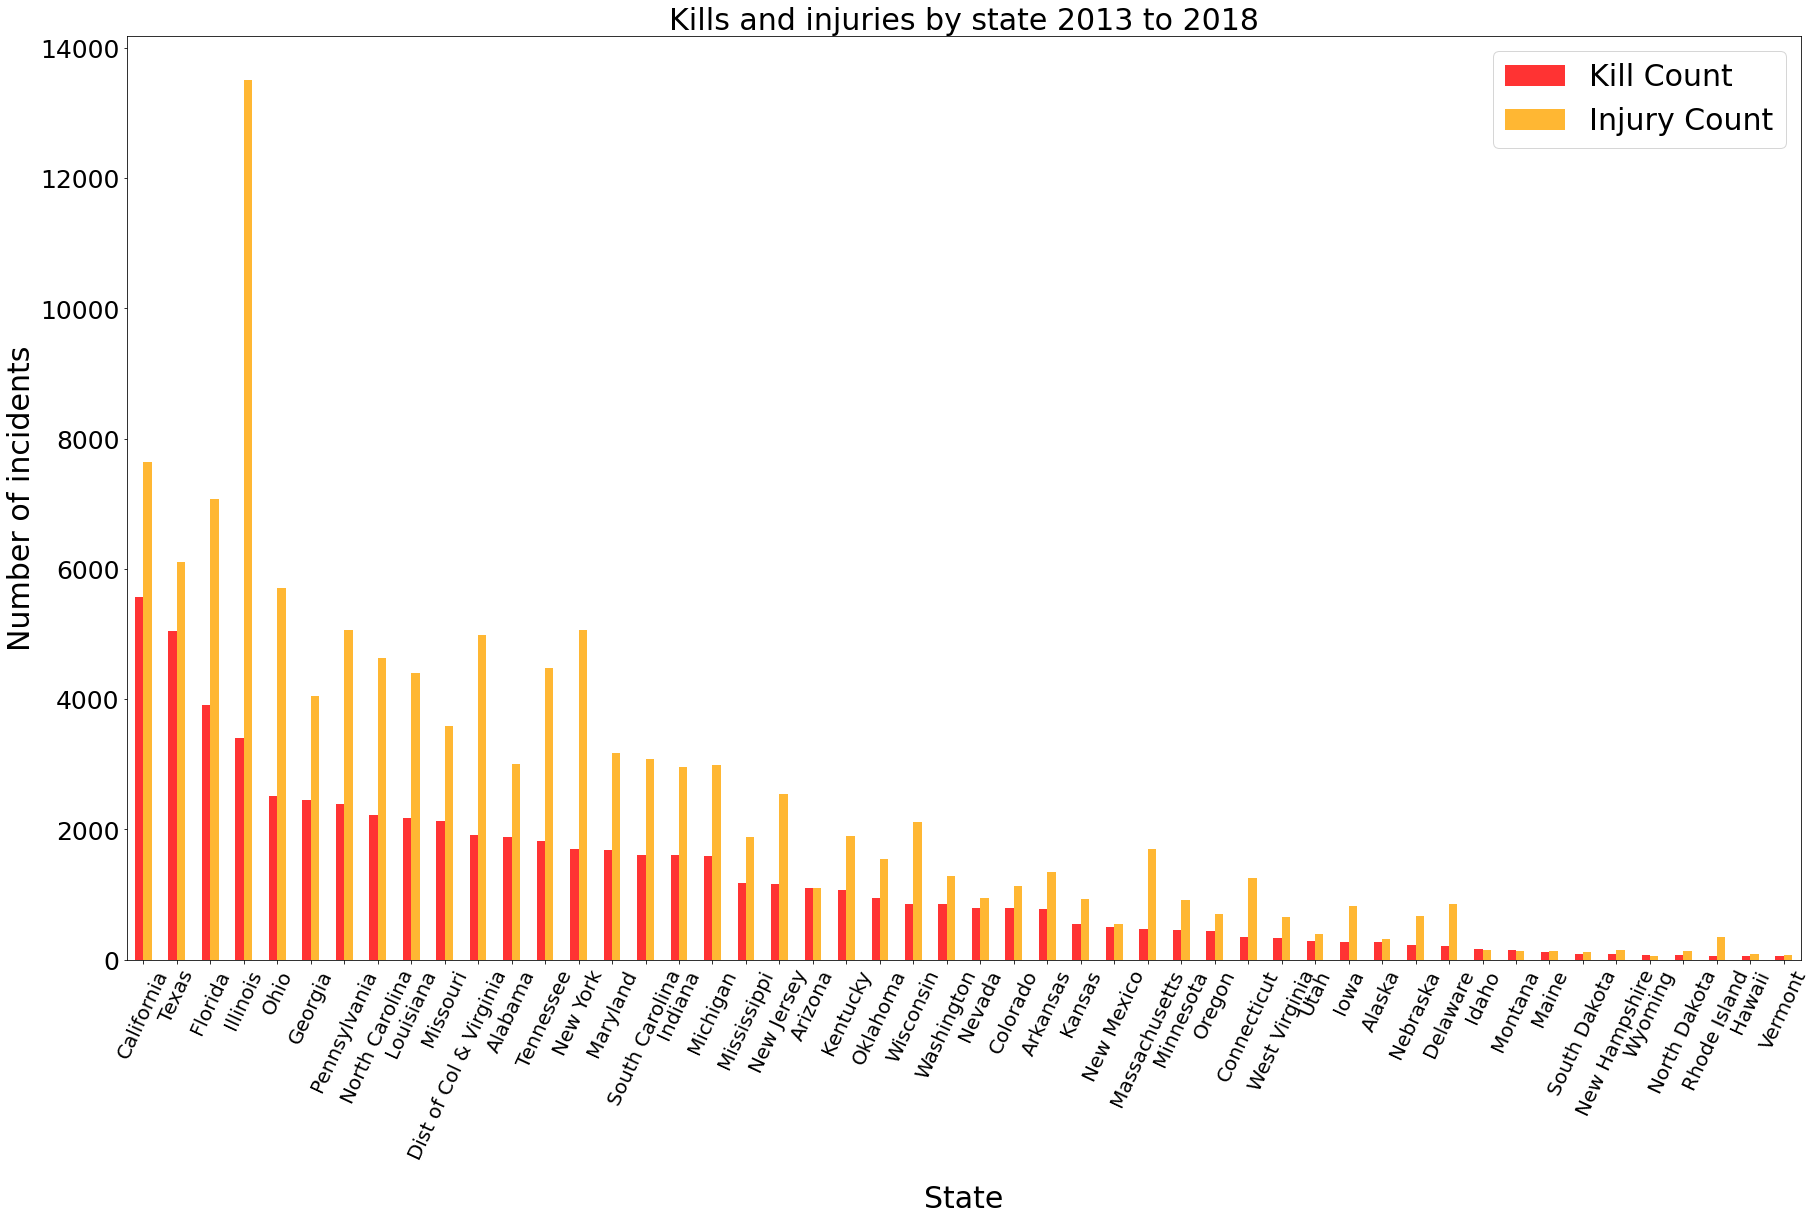

In [42]:
# bar plot of injuries and kills by state
fig_km1 = plt.figure()
colors= ["red","orange"]

# sort by descending and plot chart
sorted_df =casualty_sum.sort_values(by="Kill Count",ascending=False)

# create bar chart
sorted_df.plot(kind="bar",color= colors,alpha=0.8,figsize=(30, 17))
plt.xticks(rotation=65, fontsize=20)

# Title and labels
plt.title("Kills and injuries by state 2013 to 2018",fontsize=30)
plt.ylabel("Number of incidents", fontsize=30)
plt.xlabel("State",fontsize=30)
plt.legend(fontsize=30)

# save image
plt.savefig("Images/fig_km1_bar_chart.png")

fig_km1

The r-value is: 0.8679658550022051


,Kill Count,Injury Count
state,,
California,5562,7644
Texas,5046,6106
Florida,3909,7072
Illinois,3409,13514
Ohio,2508,5703
Georgia,2456,4056
Pennsylvania,2395,5056
North Carolina,2225,4629
Louisiana,2179,4398


<Figure size 432x288 with 0 Axes>

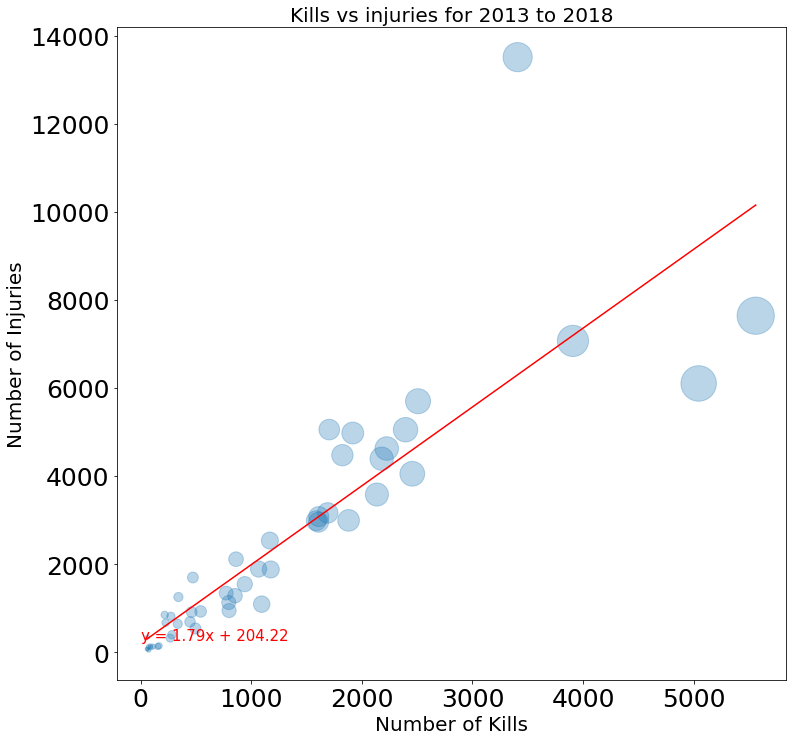

In [43]:

# create scatter plot to see if there is a positve correlation of injuries to kills by state
fig_km2 = plt.figure()
size = sorted_df["Kill Count"]

# linear regression calc and plot
from scipy.stats import linregress
#
(slope, intercept, rvalue, pvalue, stderr) = linregress(sorted_df["Kill Count"],
                                                        sorted_df["Injury Count"])
regress_values = sorted_df["Kill Count"]* slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
sorted_df.plot(kind="scatter", x="Kill Count", y="Injury Count",
            alpha=0.3,s=(size/4),figsize=(12,12))

plt.plot(sorted_df["Kill Count"],regress_values,"r-")
plt.annotate(line_eq,(0,275),fontsize=15,color="red")

# Title and labels
plt.title("Kills vs injuries for 2013 to 2018",fontsize=20)
plt.ylabel("Number of Injuries", fontsize=20)
plt.xlabel("Number of Kills",fontsize=20)

# save image
plt.savefig("Images/fig_km2_scatter_plot.png")

# show image and rvalue
fig_km2
print(f"The r-value is: {rvalue}")
sorted_df

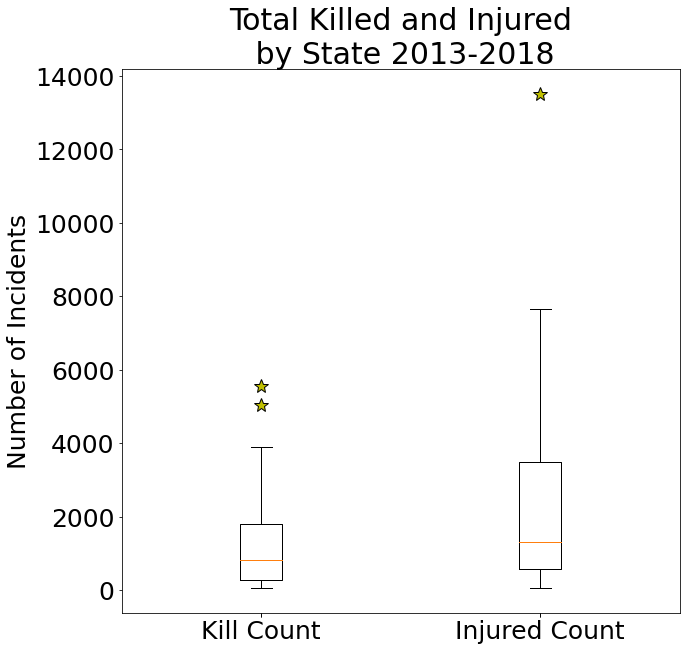

In [44]:
# Generate a box plot of injury data
flierprops = dict(marker="*", markerfacecolor= "y", markersize=15)
xlabels= ["Kill Count", "Injured Count"]

# plot boxplot for kill counts and injuries
fig_km3, ax1 = plt.subplots(figsize=(10,10))

# Set labels for title and axes
ax1.set_title("Total Killed and Injured\n by State 2013-2018")
ax1.set_ylabel("Number of Incidents")
plt.xticks([1, 2], ["Kill Count", "Injured Count"])
ax1.boxplot(sorted_df,labels= xlabels, flierprops=flierprops)

fig_km3

# Save graph 
plt.savefig("Images/fig_km3_boxplot.png")

In [45]:
# Determine if there are any potential outliers in kill counts
quartiles1 = sorted_df['Kill Count'].quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles1[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

kill_count_outliers = sorted_df.loc[(sorted_df['Kill Count'] < lower_bound) | (sorted_df['Kill Count'] > upper_bound)]
kill_count_outliers


The lower quartile is: 268.5
The upper quartile is: 1794.25
The interquartile range is: 1525.75
The the median is: 826.0 
Values below -2020.125 could be outliers.
Values above 4082.875 could be outliers.


,Kill Count,Injury Count
state,,
California,5562,7644
Texas,5046,6106


In [46]:
# Determine if there are any potential outliers in kill counts
quartiles1 = sorted_df['Injury Count'].quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles1[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

state_injury_outliers = sorted_df.loc[(sorted_df['Injury Count'] < lower_bound) | (sorted_df['Injury Count'] > upper_bound)]
state_injury_outliers

The lower quartile is: 569.5
The upper quartile is: 3480.5
The interquartile range is: 2911.0
The the median is: 1317.0 
Values below -3797.0 could be outliers.
Values above 7847.0 could be outliers.


,Kill Count,Injury Count
state,,
Illinois,3409,13514


In [47]:
# create df showing kills and injuries by City
city_county_df = gun_violence_data.groupby(gun_violence_data["city_or_county"])   
# check number of cities or counties
city_count = city_county_df["city_or_county"].nunique()
city_count

city_or_county
Abbeville                    1
Abbotsford                   1
Abbott                       1
Abbott Township              1
Abbottstown                  1
                            ..
Zumbro Falls                 1
Zumbrota                     1
Zuni (Zuni Pueblo)           1
Zwolle                       1
jefferson parish (county)    1
Name: city_or_county, Length: 12898, dtype: int64

In [48]:
# sum casualties by city
city_sum=city_county_df.sum()

# kill totals for plotting purposes
kill_city = city_sum["n_killed"]

# injured totals for plotting purposes
injury_city = city_sum["n_injured"]

# create data frame of kills and injuries
casualty_city = pd.DataFrame({"Kill Count":kill_city,
    "Injury Count":injury_city})

# select cities sorted by death, then injury count
sort_casualty_city =casualty_city.sort_values(by =["Kill Count", "Injury Count"],ascending=False)

# check top 10 cities
sort_casualty_city.head(10)

,Kill Count,Injury Count
city_or_county,,
Chicago,2104,10427
Houston,1145,1255
Baltimore,1055,2427
Saint Louis,919,1783
Philadelphia,901,2326
New Orleans,703,1892
Los Angeles,636,553
Memphis,623,1690
Indianapolis,616,1131


In [49]:
# Set up df without the "safe_cities"
# clean_casualties= casualty_city[casualty_city['Kill Count']>5]
# clean_casualties

#Create bins and labels
kill_bins = [0,5,25,50,75,100,150,200,300,500,np.inf]
kill_brackets = ["<5","6-25","26-50","51-75","76-100","101-150","151-200","201-300","301-500","500+"]


# #use pd.cut function to catergorise the existing incidences
kill_city = pd.cut(casualty_city["Kill Count"],kill_bins,labels=kill_brackets,include_lowest=True)

# check bins and counts by sorting by value_counts and reset_index
kill_df =kill_city.value_counts()
kill_df.index.names=["Number of Incidents"]
sorted_kill_df = kill_df.reset_index()

# Fix last 3 rows so they are ascending by bins
sorted_kill_df.iloc[8], sorted_kill_df.iloc[9] =sorted_kill_df.iloc[9], sorted_kill_df.iloc[8]
sorted_kill_df.iloc[8], sorted_kill_df.iloc[7] = sorted_kill_df.iloc[7], sorted_kill_df.iloc[8]

sorted_kill_df


,Number of Incidents,Kill Count
0,<5,11500
1,6-25,1088
2,26-50,150
3,51-75,44
4,101-150,36
5,76-100,21
6,151-200,17
7,201-300,11
8,301-500,16
9,500+,15


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

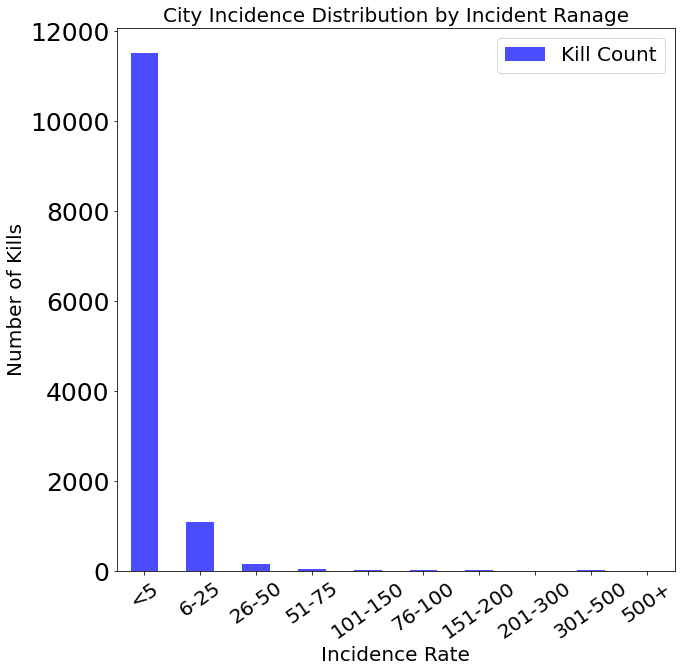

In [50]:
# bar plot of injuries and kills by state
fig_km4 = plt.figure()
colors3= ["blue"]

# create bar chart
sorted_kill_df.plot(kind="bar",color=colors3,alpha=0.7,figsize=(10, 10),x="Number of Incidents")

# Title and labels
plt.title("City Incidence Distribution by Incident Ranage",fontsize=20)
plt.ylabel("Number of Kills", fontsize=20)
plt.xlabel("Incidence Rate",fontsize=20)
plt.xticks(rotation=35, fontsize=20)

plt.legend(fontsize=20)

# save image
plt.savefig("Images/fig_km4_bar_chart.png")

fig_km4

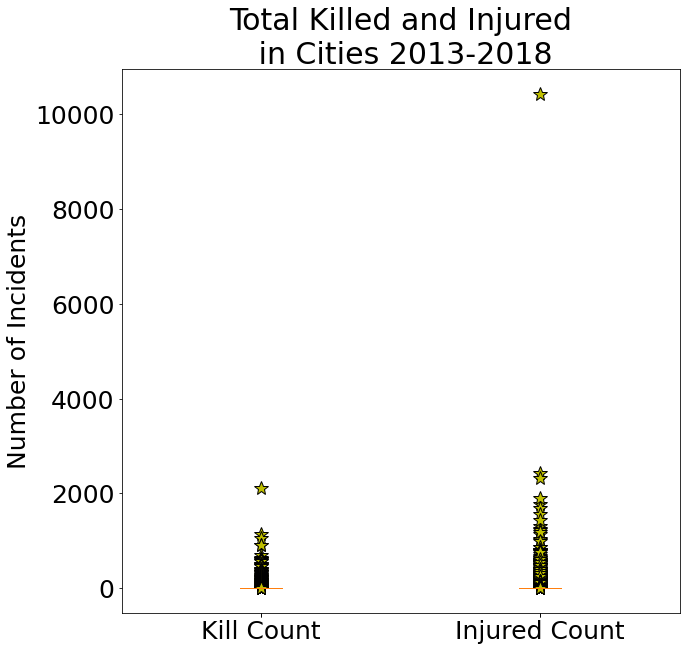

In [51]:
# Generate a box plot of injury data
flierprops = dict(marker="*", markerfacecolor= "y", markersize=15)
labels5= ["Kill Count", "Injured Count"]

# plot boxplot for kill counts and injuries
fig_km5, ax1 = plt.subplots(figsize=(10,10))

# Set labels for title and axes
ax1.set_title("Total Killed and Injured\n in Cities 2013-2018")
ax1.set_ylabel("Number of Incidents")
plt.xticks([1, 2], ["Kill Count", "Injured Count"])
ax1.boxplot(sort_casualty_city,labels= labels5, flierprops=flierprops)

fig_km5

# Save graph 
plt.savefig("Images/fig_km5_boxplot.png")

In [52]:
# Determine if there are any potential outliers in kill counts
quartiles1 =sort_casualty_city['Kill Count'].quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles1[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

city_kill_outliers = sort_casualty_city.loc[(sort_casualty_city['Kill Count'] < lower_bound) | (sort_casualty_city['Kill Count'] > upper_bound)]

# Number of outlier cities due to kill count
city_kill_outliers.count()

The lower quartile is: 0.0
The upper quartile is: 2.0
The interquartile range is: 2.0
The the median is: 1.0 
Values below -3.0 could be outliers.
Values above 5.0 could be outliers.


Kill Count      1398
Injury Count    1398
dtype: int64

In [53]:
# Determine if there are any potential outliers in kill counts
quartiles1 =sort_casualty_city['Injury Count'].quantile([.25,.5,.75])
lowerq = quartiles1[0.25]
upperq = quartiles1[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles1[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

city_injury_outliers = sort_casualty_city.loc[(sort_casualty_city['Injury Count'] < lower_bound) | (sort_casualty_city['Injury Count'] > upper_bound)]

# Number of outlier cities due to kill count
city_injury_outliers.count()

The lower quartile is: 0.0
The upper quartile is: 2.0
The interquartile range is: 2.0
The the median is: 1.0 
Values below -3.0 could be outliers.
Values above 5.0 could be outliers.


Kill Count      1645
Injury Count    1645
dtype: int64

(<Figure size 1440x1440 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

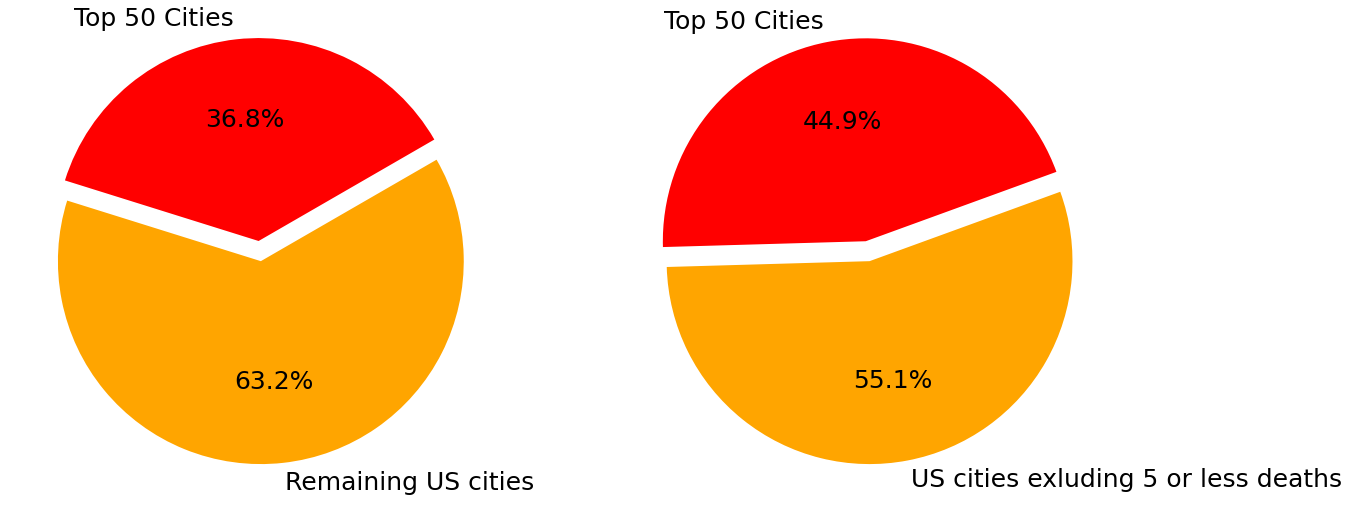

In [57]:
# split datafor pie charts
killer_cities =sort_casualty_city.loc[sort_casualty_city["Kill Count"]>168]
med_to_no_risk=sort_casualty_city.loc[sort_casualty_city["Kill Count"]<169]
safe_cities=sort_casualty_city.loc[sort_casualty_city["Kill Count"]<5]
med_risk_cities=sort_casualty_city.loc[(sort_casualty_city['Kill Count'] <169 
                                ) & (sort_casualty_city['Kill Count'] >5)]


# Total the values for each dataset and create index
top_50= killer_cities.sum()#Kill Count 22277 Injury Count 52536
med_to_no=med_to_no_risk.sum()#Kill Count38191 Injury Count 65866
prob=med_risk_cities.sum()#Kill Count 27336 Injury Count 51593
safe =med_to_no_risk.sum()#Kill Count 38191 Injury Count 65866
index=[0,1]

# create data frames for pie charts
pie_data1 = list(zip(top_50,med_to_no))
pie_data2 = list(zip(top_50,prob))

pie1= pd.DataFrame(pie_data1,columns=["Top 50 Cities","Rest of US cities"])
pie2= pd.DataFrame(pie_data2,columns=["Top 50 Cities","Rest of US over 5 deaths"])

# transpose df index and rename columns
pie1 = pie1.T
pie1["index"]=index
pie1.columns=["Kill Count","Injury Count","index"]
pie1=pie1.set_index(keys=["index"])

pie2 = pie2.T
pie2["index"]=index
pie2.columns=["Kill Count","Injury Count","index"]
pie2=pie2.set_index(keys=["index"])

# create variables for plotting
pie_1 =pie1["Kill Count"]
pie_2 =pie2["Kill Count"]

colors1= ["red","orange"]
colors2= ["red","darkorange"]
labels1 = ["Top 50 Cities","Remaining US cities"]
labels2 = ["Top 50 Cities","US cities exluding 5 or less deaths"]
explode=(0.1, 0)

# increase labels & percentages size
plt.rcParams.update({'font.size': 25})

# Plot
fig_km6=fig,(axs1,axs2)= plt.subplots(1,2,figsize=(20,20))
axs1.pie(pie_1, explode=explode, labels=labels1, colors=colors,
        autopct="%1.1f%%", startangle=30)

axs2.pie(pie_2, explode=explode, labels=labels2, colors=colors,
        autopct="%1.1f%%", startangle=20)

# save image
plt.savefig("Images/fig_km6_pie_sub_plots.png")

fig_km6


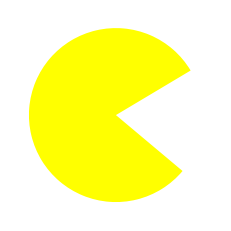

In [55]:
#Pac-Man Pie chart for Josh 
sizes = [60, 245]
# Plot
plt.pie(sizes, startangle=320, colors= ["white","yellow"])
plt.show()